In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.

In [73]:
#Dados
t20_value = np.array([71.71, 71.31, 71.21, 71.20, 71.70])
t30_value = np.array([46.48, 46.98, 46.54, 46.57, 45.94])
t40_value = np.array([34.73, 34.55, 34.62, 34.46, 34.48])
t50_value = np.array([27.96, 27.68, 27.82, 27.83, 27.55])

#Incertezas do tipo A - Tempo
t20 = ufloat(t20_value.mean(), t20_value.std(ddof=1)/np.sqrt(len(t20_value)))
t30 = ufloat(t30_value.mean(), t30_value.std(ddof=1)/np.sqrt(len(t30_value)))
t40 = ufloat(t40_value.mean(), t40_value.std(ddof=1)/np.sqrt(len(t40_value)))
t50 = ufloat(t50_value.mean(), t50_value.std(ddof=1)/np.sqrt(len(t50_value)))

#Incertezas do tipo B - Temperatura
Temp = ufloat(24, 0.5/np.sqrt(3))

#Simplificar
P = [20, 30, 40, 50]
t = [t20, t30, t40, t50]

In [74]:
pd.DataFrame({'P20':t20_value, 'P30':t30_value, 'P40':t40_value, 'P50':t50_value})

,P20,P30,P40,P50
0,71.71,46.48,34.73,27.96
1,71.31,46.98,34.55,27.68
2,71.21,46.54,34.62,27.82
3,71.20,46.57,34.46,27.83
4,71.70,45.94,34.48,27.55


In [75]:
pd.DataFrame({'T20':t20, 'T30':t30, 'T40':t40, 'T50':t50}, index=[0])

,T20,T30,T40,T50
0,71.43+/-0.12,46.50+/-0.17,34.57+/-0.05,27.77+/-0.07


In [76]:
#Cálculo da viscosidade com erro
mi = []
for i in range(4):
    mi.append(P[i]*t[i]*0.1142)

#Média dos valores
mean_mi = 0
for i in range(len(mi)):
    mean_mi += mi[i]
mean_mi = mean_mi/4

print(f'Média da viscosidade {mean_mi}[cp] ou {mean_mi}[10-3Pa.s]')
df = pd.DataFrame({'P':P, 'Tempo':t, 'mi':mi})
df

Média da viscosidade 159.73+/-0.19[cp] ou 159.73+/-0.19[10-3Pa.s]


,P,Tempo,mi
0,20,71.43+/-0.12,163.14+/-0.26
1,30,46.50+/-0.17,159.3+/-0.6
2,40,34.57+/-0.05,157.91+/-0.23
3,50,27.77+/-0.07,158.6+/-0.4


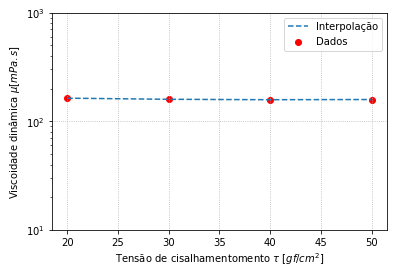

In [77]:
#Figura 1
fig, ax = plt.subplots()
ax.set(ylabel=r'Viscoidade dinâmica $\mu$[$mPa.s$]', xlabel=r'Tensão de cisalhamentomento $\tau$ [$gf/cm^2$]')

#Erros de medida e dados
f = []
for i in range(4):
        f.append(mi[i].n)

ax.plot(P, f, '--', label='Interpolação')
ax.scatter(P, f, c='red', label='Dados')

ax.grid(ls='dotted')
ax.legend()
ax.set_ylim(10, 1000)
plt.yscale("log")  

fig.savefig('visc_x_tensao.pdf', bbox_inches='tight')

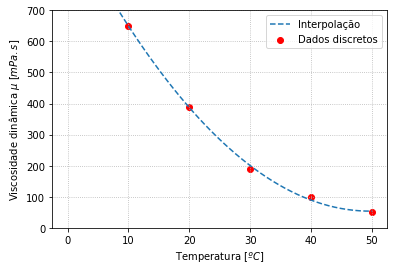

In [78]:
#Figura 2
import ZebraLib as zb

x = [10, 20, 30, 40, 50]
y= [650, 390, 190, 100, 50]
x_new = np.linspace(0, 50)

res = zb.fit(x, y, 2)

fig, ax = plt.subplots()
ax.set( xlabel=r'Temperatura $[ºC]$', 
        ylabel=r'Viscosidade dinâmica $\mu$ $[mPa.s]$')

ax.scatter(x, y, c='red', label='Dados discretos')
ax.plot(x_new, res(x_new), '--',label='Interpolação')
ax.legend()

ax.grid(ls='dotted')
ax.set_ylim(0, 700)

fig.savefig('corno.pdf', bbox_inches='tight')

In [79]:
res(24)

303.31428571428603

In [83]:
a = ufloat(159.73, 0.19)
b = ufloat(res(24), 0.5)

abs(a-b)/b*100

47.33845139412214+/-0.10705112373466127